# Excercise 5
## Neural Networks in Keras and Pytorch 🔥

Use keras framework to solve the below exercises.


1. Instalacion de librerias de tensorflow y demas necesarias para la red
neuronal

In [ ]:
!pip install livelossplot
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.nn import relu, softmax
from tensorflow.keras.regularizers import l1_l2, l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import clear_session
from livelossplot import PlotLossesKeras
from tensorflow.keras.layers import Dense, Input

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# 5 Moons Dataset

**Exercise:** Use keras and pytorch framework to find a decision boundary for point in the make_moons.

2. Creación de dataset make_moons desde sklearn, división del dataset de datos en entrenamiento (70%) y test (30%)


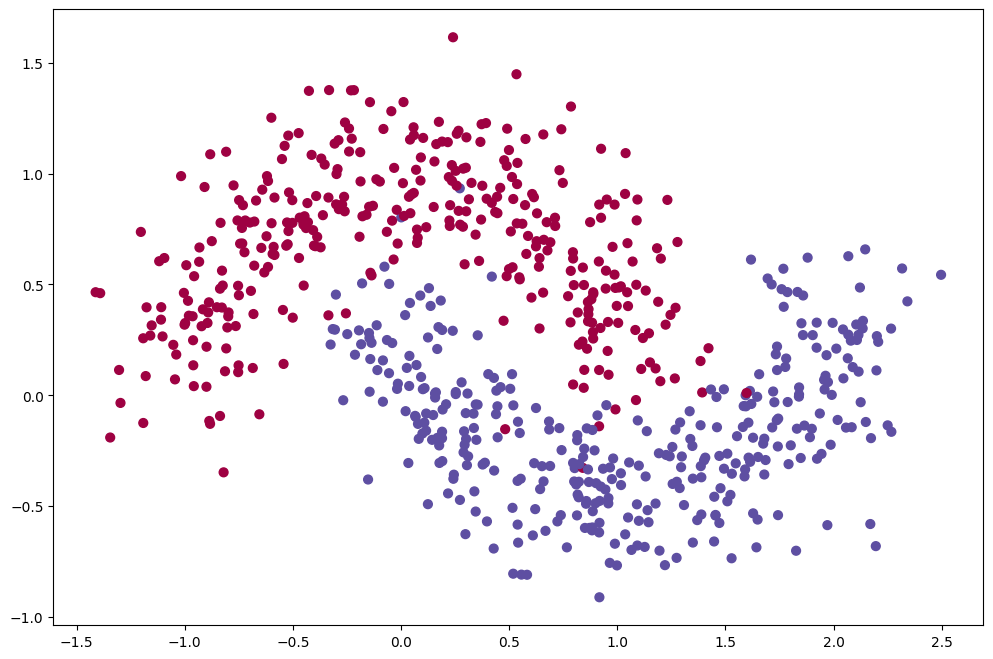

In [ ]:
# Create moons dataset.
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
plt.figure(figsize=(12, 8))
plt.scatter(X_train[:, 0], X_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

3. Estandarización de los datos

In [ ]:
scaler = StandardScaler()

4. Conversión de la variable y en categorica

In [ ]:
y = to_categorical(y)

5. Normalización de los datos de entrenamiento y test


In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

6. Creación del modelo de red neuronal secuencial con 1 capa con 5 neuronas con 2 entradas, función de activación ReLU, capa de salida con 1 neurona con una funcion de activación "sigmoide" que da una salida de 0 o 1.


In [ ]:
model = Sequential()
model.add(Dense(5, input_shape=(2,), activation='relu'))  # Capa oculta con 5 neuronas y función de activación ReLU
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7. Resumen de la arquitectura del modelo secuencia, nombre y tipo de capa, cantidad de neuronas y número de parametros

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

8. configuración de tipo de optimizadorque utilizará el modelo el cual es "Adam", función de perdida "binary_crossentropy" y metricas de medición que en este caso es el "accuracy"


In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

9. graficos de evolución de funcion de perdida y ganancia de precisión a través del entrenamiento

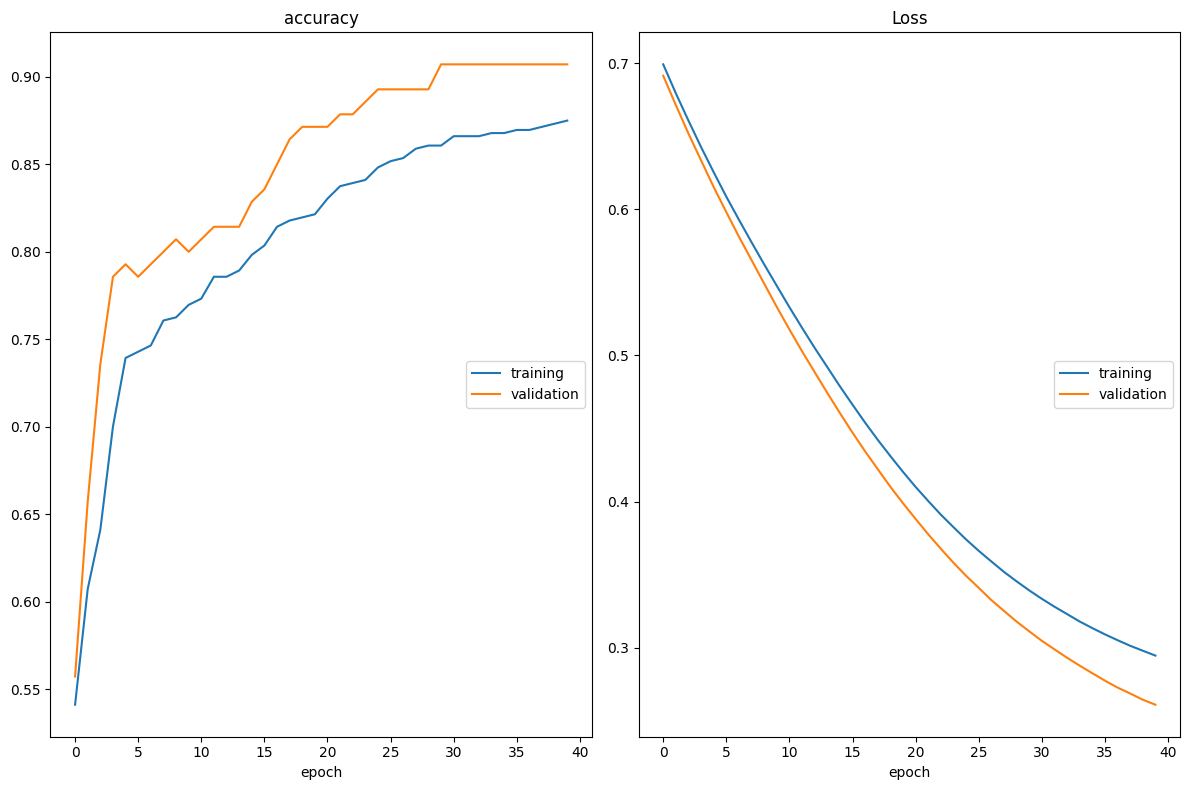

accuracy
	training         	 (min:    0.541, max:    0.875, cur:    0.875)
	validation       	 (min:    0.557, max:    0.907, cur:    0.907)
Loss
	training         	 (min:    0.295, max:    0.699, cur:    0.295)
	validation       	 (min:    0.261, max:    0.692, cur:    0.261)
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8741 - loss: 0.2997 - val_accuracy: 0.9071 - val_loss: 0.2609


In [ ]:
moon_model = model.fit(X_train, y_train, batch_size=32, epochs=40, validation_split=0.2, verbose=1, callbacks=[PlotLossesKeras()])

10. Evaluación del modelo en dataset de test

In [ ]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8357 - loss: 0.3375 


[0.3191452622413635, 0.8533333539962769]

# 5.1 Decision Boundary -- Keras

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

**Hint:** Use the next function to plt the decision boundary,

In [ ]:
import matplotlib.pyplot as pl

11. Funcion plot_decision_boundary para visualizar las imagenes de decisión,

3507/3507 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


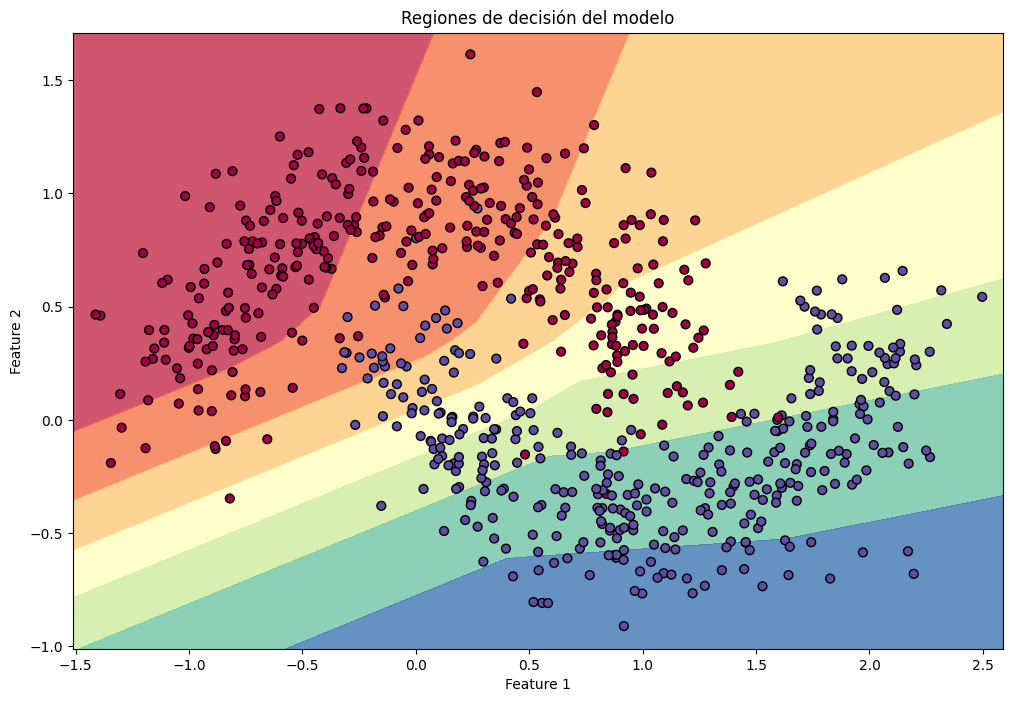

In [ ]:
def plot_decision_boundary(model, x, y):
    # Define el rango de valores para la malla
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Genera predicciones para la malla
    preds = model.predict(np.c_[xx.ravel(), yy.ravel()])
    preds = preds.reshape(xx.shape)

    # Visualiza las regiones de decisión
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, preds, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title("Regiones de decisión del modelo")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualiza las predicciones del modelo
plot_decision_boundary(model, X_train, y_train)

# **Analisis de los resultados:**

El modelo de red neuronal con keras, identifica patrones complejos teniendo en cuenta que utiliza los tonos degrade en aquellas zonas que presenta incertidumbre.

Colocando en la zona roja la clase 1 (puntos rojos) y la clase 2 (puntos azules) en la zona azul, de acuerdo a su precisión puede observarse que predice bien los resultados, con un riesgo bajo de overfiting

# 5.2 Decision Boundary -- PyTorch 🔥

**Exercise:** Use PyTorch to find a decision boundary for point in the make_moons.

**Hint:** Use the next function to plt the decision boundary,

In [ ]:
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
%matplotlib inline

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
class Model(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(Model, self).__init__()
        self.input_layer    = nn.Linear(input_dim,128)
        self.hidden_layer1  = nn.Linear(128,64)
        self.output_layer   = nn.Linear(64,output_dim)
        self.relu = nn.ReLU()


    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.output_layer(out)
        return out

In [ ]:
input_dim  = 2
output_dim = 2
model = Model(input_dim,output_dim)

In [ ]:
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
def train_model(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()

        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)



        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()


        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [ ]:
import numpy as np
num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [ ]:
train_model(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)

Epoch 50/1000, Train Loss: 0.0599, Test Loss: 0.0819
Epoch 100/1000, Train Loss: 0.0509, Test Loss: 0.1088
Epoch 150/1000, Train Loss: 0.0478, Test Loss: 0.1198
Epoch 200/1000, Train Loss: 0.0442, Test Loss: 0.1283
Epoch 250/1000, Train Loss: 0.0406, Test Loss: 0.1418
Epoch 300/1000, Train Loss: 0.0383, Test Loss: 0.1484
Epoch 350/1000, Train Loss: 0.0355, Test Loss: 0.1637
Epoch 400/1000, Train Loss: 0.0348, Test Loss: 0.1708
Epoch 450/1000, Train Loss: 0.0392, Test Loss: 0.1460
Epoch 500/1000, Train Loss: 0.0311, Test Loss: 0.1698
Epoch 550/1000, Train Loss: 0.0289, Test Loss: 0.1846
Epoch 600/1000, Train Loss: 0.0272, Test Loss: 0.1986
Epoch 650/1000, Train Loss: 0.0253, Test Loss: 0.2180
Epoch 700/1000, Train Loss: 0.0242, Test Loss: 0.2517
Epoch 750/1000, Train Loss: 0.0251, Test Loss: 0.2040
Epoch 800/1000, Train Loss: 0.0213, Test Loss: 0.2287
Epoch 850/1000, Train Loss: 0.0194, Test Loss: 0.2382
Epoch 900/1000, Train Loss: 0.0178, Test Loss: 0.2484
Epoch 950/1000, Train Loss: 0

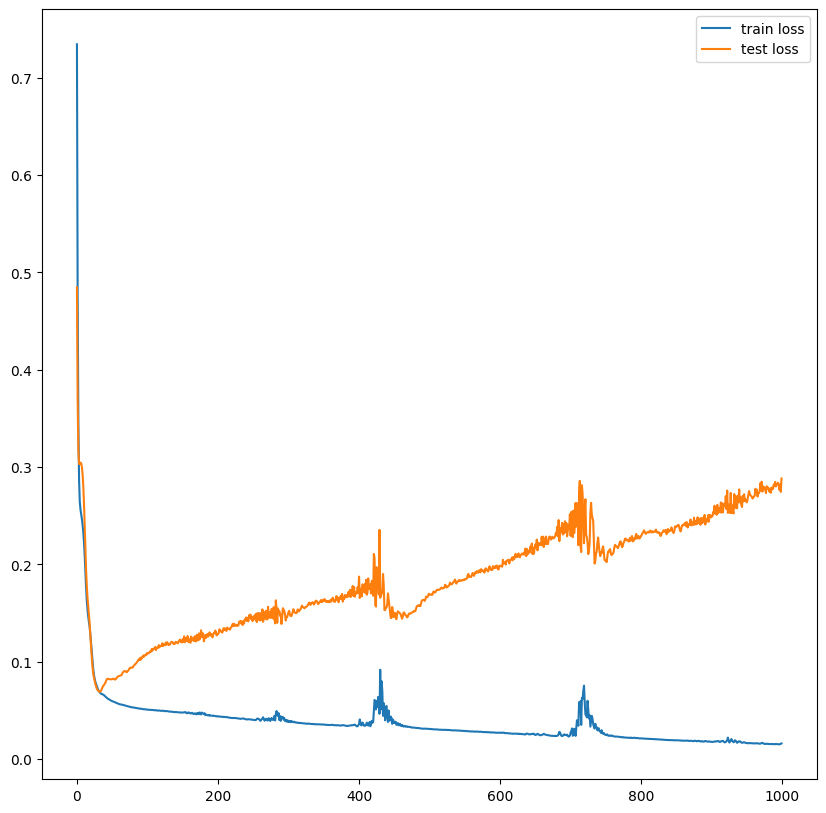

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [ ]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [ ]:
model.eval()
X_train = X_train.numpy()
print(type(X_train))

<class 'numpy.ndarray'>


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━

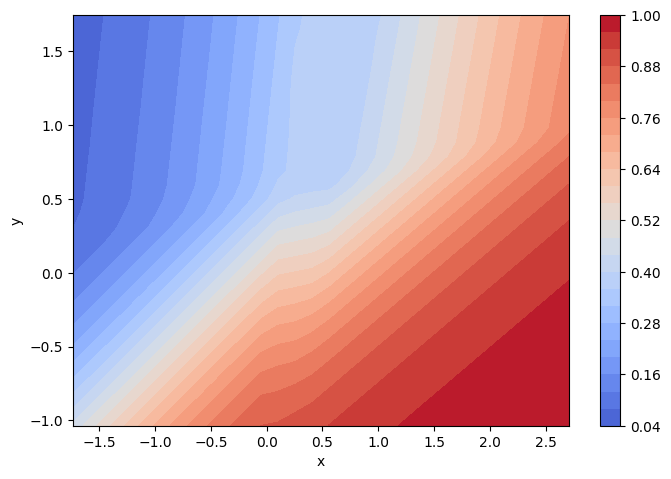

In [ ]:
#model = 'Sequential neural network in PyTorch'
import matplotlib.pyplot as plt

def plot_decision_region(model, X_train, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")


def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

plt.figure(figsize = (8,16/3))
'''
Here 'model' is the neural network you previous trained.
'''
plot_decision_region(model, X_train, pred_fun)
#plot_data(X_train, y_train)

In [ ]:
def plot_decision_region(model, X, pred_fun):
    # Asegurar que X es un tensor
    if not isinstance(X, torch.Tensor):
        raise TypeError("X debe ser un tensor de PyTorch.")

    # Definir límites del gráfico
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Crear una malla de puntos para el contorno de la región
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1),
                            torch.arange(y_min, y_max, 0.1),
                            indexing='ij')

    # Generar predicciones del modelo
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
    with torch.no_grad():
        Z = pred_fun(model, grid)

    # Redimensionar Z para que coincida con las dimensiones de la malla
    Z = Z.view(xx.shape)

    # Graficar el contorno de la región de decisión
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Spectral)

    # Graficar los puntos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=pred_fun(model, X), cmap=plt.cm.Spectral, edgecolors='k')
    plt.show()


<ipython-input-74-95456a220fcb>:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
<ipython-input-74-95456a220fcb>:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.arange(y_min, y_max, 0.01))


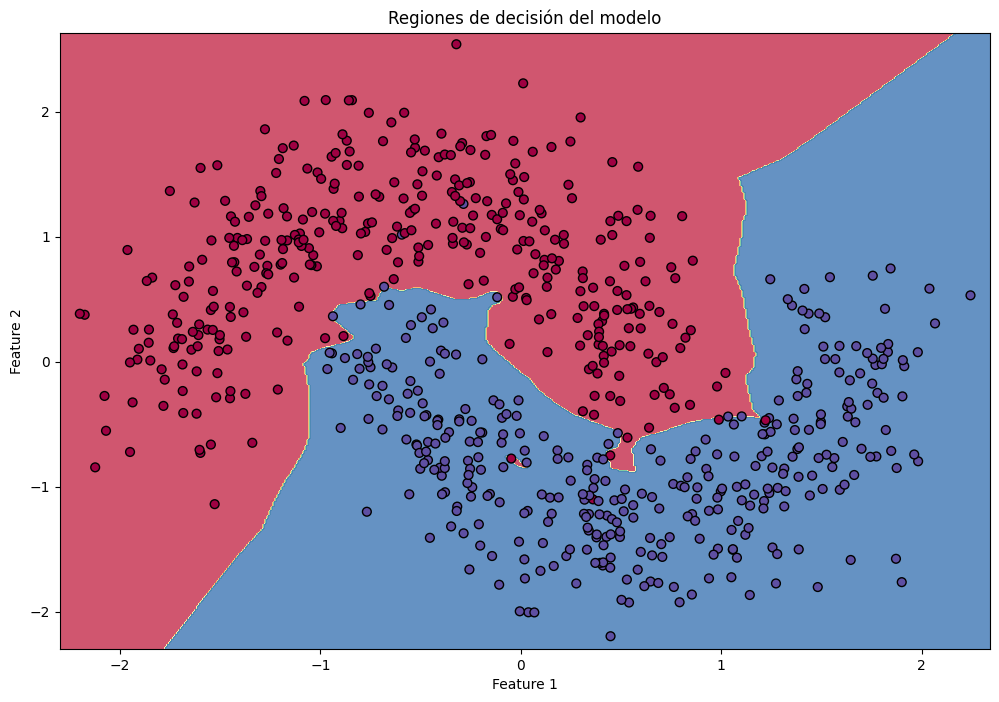

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def plot_decision_boundary(model, x, y):
    # Define el rango de valores para la malla
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Convierte la malla en un tensor de PyTorch
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_tensor = torch.FloatTensor(mesh_points)  # Conversión a tensor

    # Deshabilita el cálculo de gradientes para acelerar la inferencia
    with torch.no_grad():
        preds = model(mesh_tensor)
        preds = torch.argmax(preds, dim=1).numpy()  # Obtiene la clase predicha

    preds = preds.reshape(xx.shape)

    # Visualiza las regiones de decisión
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, preds, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title("Regiones de decisión del modelo")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualiza las predicciones del modelo
plot_decision_boundary(model, X_train, y_train)
